# Discrete Data Distributions

## Binomial distribution

### **Bernoulli Trial: The Foundational Unit**
A **Bernoulli trial** is a single experiment or observation with only two possible outcomes: **success** (with probability (p)) or **failure** (with probability (1-p)). It is one of the simplest forms of probabilistic experiments and serves as the building block for many discrete probability distributions, including the **binomial distribution**.

**Characteristics of a Bernoulli Trial:**
1. **Two Outcomes:** The result of a Bernoulli trial is binary—either a success ((X=1)) or a failure ((X=0)).
2. **Probability of Success ((p)):** The likelihood of success is denoted as (p), while failure occurs with probability (1-p).
3. **Independence:** Each trial is independent of all others; the outcome of one trial does not affect the outcome of another.
4. **Single Trial:** It considers one event or experiment at a time.


### **Binomial Distribution: A Collection of Bernoulli Trials**
The **binomial distribution** generalizes Bernoulli's experiment by extending it to multiple independent trials. It models the probability of observing a specified number of successes ((k)) in (n) independent Bernoulli trials, each with the same success probability ((p)).

The key idea is that the **binomial distribution is a collection of (n) Bernoulli trials**:
1. **Repetition of Bernoulli Trials:** Instead of performing just one Bernoulli trial, (n) identical and independent trials are conducted.
2. **Fixed Number of Trials ((n)):** The number of trials is predetermined and does not vary.
3. **Constant Probability ((p)):** The probability of success remains unchanged across all trials.
4. **Count of Successes ((k)):** The binomial distribution focuses on the total number of successes observed in (n) trials.

The **tips dataset** provides valuable insights into customer behavior and contains several categorical variables, including **sex** (gender of the customer) and **smoker** (whether the customer is a smoker or not). These two columns lend themselves to analysis using the **binomial distribution**, as they align with its characteristics.

Using the **sex** and **smoker** columns, we can:
- Assess the proportion of smokers within each gender group.
- Calculate binomial metrics such as the expected number of smokers (mean) and the variability (standard deviation) in each group.
- Determine probabilities for specific smoker counts using the binomial distribution's **PMF** and **CDF**.
- Visualize the smoker distributions for males and females to compare patterns and trends.

#### Plotting Shapes of Binomial Distribution
The plots generated demonstrate the shape of binomial distributions for different values of (p), while keeping the number of trials (n = 10)fixed.


0.1171875
0.1171875


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

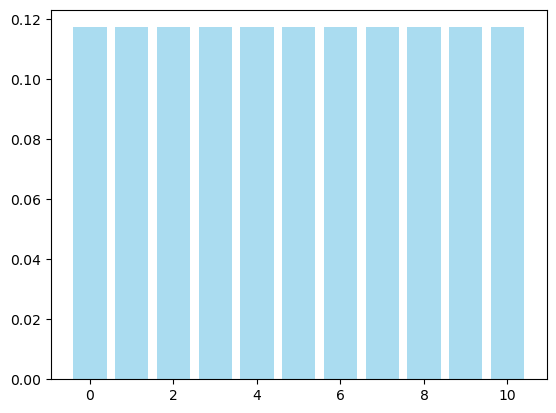

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom 

p=0.5
n=10
k=3
x = np.arange(0, n + 1)  # Possible outcomes (0 to n)
pmf=binom.pmf(k,n,p)
print(pmf)
print(binom.pmf(k,n,p))

plt.bar(x, pmf, color='skyblue', alpha=0.7, label=f'p = {p}')
plt.set_title(f'Binomial Distribution (p={p})', fontsize=12)
plt.set_xlabel('Number of Successes', fontsize=10)
plt.set_ylabel('Probability' if i == 0 else '', fontsize=10)
plt.legend()
plt.grid(alpha=0.3)


In [ ]:
scipy.stats.binom.pmf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 10  # Fixed number of trials
p_values = [0.1, 0.3, 0.5, 0.7, 0.9]  # Different probabilities of success
x = np.arange(0, n + 1)  # Possible outcomes (0 to n)

# Create subplots
fig, axes = plt.subplots(1, len(p_values), figsize=(10, 5), sharey=True)

for i, p in enumerate(p_values):
    # Calculate PMF for each probability of success
    pmf = binom.pmf(x, n, p)

    # Plot
    axes[i].bar(x, pmf, color='skyblue', alpha=0.7, label=f'p = {p}')
    axes[i].set_title(f'Binomial Distribution (p={p})', fontsize=12)
    axes[i].set_xlabel('Number of Successes', fontsize=10)
    axes[i].set_ylabel('Probability' if i == 0 else '', fontsize=10)
    axes[i].legend()
    axes[i].grid(alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

**What is the proportion of smokers among male and female customers?**

In [ ]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset('tips')

# Group data by sex and smoker
grouped_smoker_data = tips.groupby('sex')['smoker'].value_counts(normalize=True).unstack()

# Display proportions
print(grouped_smoker_data)

Female customers: 25% are smokers, while 75% are non-smokers.

Male customers: 42% are smokers, while 58% are non-smokers.

**What is the expected number of smokers among male and female customers?**

This question uses the binomial distribution to calculate the mean or expected number of smokers for male and female groups. The mean $(\mu)$ is given by: $\mu = n \cdot p$

In [ ]:
# Total customers for each gender
grouped_smoker_data['Total_Customers'] = tips.groupby('sex')['smoker'].count()

# Calculate expected number of smokers (Mean)
grouped_smoker_data['Expected_Smokers'] = grouped_smoker_data['Total_Customers'] * grouped_smoker_data['Yes']

print(grouped_smoker_data[['Total_Customers', 'Expected_Smokers']])

Females: On average, ~30 smokers are expected out of 87 female customers.

Males: On average, ~60 smokers are expected out of 157 male customers.

**What is the variability (standard deviation) in the number of smokers within male and female groups?**

Standard deviation $(\sigma)$ measures how spread out the smoking counts are. For a binomial distribution:
$\sigma = \sqrt{n \cdot p \cdot (1-p)}$

In [ ]:
import numpy as np

# Calculate standard deviation (Variability)
grouped_smoker_data['Std_Deviation'] = np.sqrt(
    grouped_smoker_data['Total_Customers'] * grouped_smoker_data['Yes'] * (1 - grouped_smoker_data['Yes'])
)

print(grouped_smoker_data[['Total_Customers', 'Expected_Smokers', 'Std_Deviation']])

**What is the probability of observing exactly 50 smokers among male and female customers?**

The PMF (Probability Mass Function) of the binomial distribution can compute the likelihood of seeing a specific count of smokers (e.g., exactly 50 smokers).

In [ ]:
from scipy.stats import binom

# PMF for exactly 50 smokers in each gender group
grouped_smoker_data['PMF_50_Smokers'] = grouped_smoker_data.apply(
    lambda row: binom.pmf(50, row['Total_Customers'], row['Yes']),
    axis=1
)

print(grouped_smoker_data[['Total_Customers', 'Expected_Smokers', 'PMF_50_Smokers']])

**How can we visualize the binomial probability distribution for smokers among males and females?**



In [ ]:
import matplotlib.pyplot as plt

# Plot binomial distribution for male and female groups
plt.figure(figsize=(10, 6))
for sex in grouped_smoker_data.index:
    n = grouped_smoker_data.loc[sex, 'Total_Customers']
    p_smoker = grouped_smoker_data.loc[sex, 'Yes']
    x = np.arange(0, n + 1)
    binomial_pmf = binom.pmf(x, n, p_smoker)

    plt.plot(x, binomial_pmf, label=f"{sex} (p={p_smoker:.2f})", linestyle = '--')

plt.title("Binomial Probability Distribution of Smokers by Gender", fontsize=16)
plt.xlabel("Number of Smokers", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The plot will show two probability distributions:
* One for female customers (narrower curve due to fewer total customers and lower proportion of smokers).
* One for male customers (wider curve due to more customers and higher proportion of smokers).

## Poisson Distribution

The **Poisson distribution** is a discrete probability distribution that models the number of events occurring within a fixed interval, given the following conditions:
1. **Independence:** Events occur independently of one another.
2. **Constant Rate ($\lambda$):** The average number of occurrences ($\lambda$) remains constant over time or space.
3. **Non-Overlap:** Two events cannot occur simultaneously.

#### **Key Characteristics:**
1. **Parameter:** The rate parameter $\lambda$, which represents the average number of events in the interval.
2. **Probability Mass Function (PMF):** Describes the probability of observing k events.

   $P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \, k \geq 0
   \$
   
3. **Mean and Variance:** Both equal to $\lambda$:

   $
   \mu = \sigma^2 = \lambda
   $

#### **Applications:**
- Customer arrivals at a store.
- Calls received at a call center.
- Number of accidents in a specific area.

The PMF of the Poisson distribution for different values of $\lambda$ (average rate of occurrence). As $\lambda$ increases, the distribution spreads and becomes more symmetric.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda_values = [2, 5, 10]  # Different average rates (lambda)
x = np.arange(0, 20)  # Possible values of events (0 to 19)

# Create subplots
fig, axes = plt.subplots(1, len(lambda_values), figsize=(18, 5), sharey=True)

for i, lambda_val in enumerate(lambda_values):
    # Calculate PMF for each lambda value
    pmf = poisson.pmf(x, lambda_val)

    # Plot
    axes[i].bar(x, pmf, color='skyblue', alpha=0.7, label=f'λ = {lambda_val}')
    axes[i].set_title(f'Poisson Distribution (λ={lambda_val})', fontsize=12)
    axes[i].set_xlabel('Number of Events (k)', fontsize=10)
    axes[i].set_ylabel('Probability' if i == 0 else '', fontsize=10)
    axes[i].legend()
    axes[i].grid(alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

$\lambda = 2$: Most of the probability is concentrated near 0, and the distribution is heavily skewed to the right.

$\lambda = 5$: The peak shifts to around 5, with a more spread-out curve

$\lambda = 10$: The distribution becomes symmetric, centered at 10.

#### Poisson Distribution in Call Center Data

A popular example of Poisson-distributed data is **call center data**, where the number of calls received per minute/hour follows a Poisson distribution. This dataset typically contains:
- **Time intervals:** Minutes or hours during which calls are recorded.
- **Number of calls:** Count of calls received in each interval.

The Poisson distribution is suitable for modeling this data because:
1. Calls occur **independently** of each other.
2. The **rate of calls ($\lambda$)** is constant over time.
3. The probability of two calls occurring at the exact same instant is negligible.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Simulated Poisson-distributed call center data
# Average rate of calls per interval (lambda)
lambda_values = [2, 5, 10]  # Different average rates for analysis
intervals = 100  # Number of intervals to simulate

# Generate random samples for each lambda value
call_data = {f"λ={lambda_val}": poisson.rvs(lambda_val, size=intervals) for lambda_val in lambda_values}
call_data

**Simulated Data:**
   - Random samples are generated using `poisson.rvs()` for different values of $\lambda$ (average rate of calls).

1. **What is the average rate of calls ($\lambda$) received per interval?**


In [ ]:
# 1. Average rate of calls (λ)
for lambda_val, calls in call_data.items():
    avg_rate = np.mean(calls)
    print(f"Average rate of calls for {lambda_val}: {avg_rate:.2f}")

2. **What is the probability of receiving exactly \(k\) calls in a given interval?**

In [ ]:
# 2. Probability of receiving exactly k calls (PMF)
k = 3  # Example: Probability of receiving exactly 3 calls
for lambda_val in lambda_values:
    pmf = poisson.pmf(k, lambda_val)
    print(f"PMF (k={k}, λ={lambda_val}): {pmf:.4f}")

3. **What is the cumulative probability of receiving up to \(k\) calls in a given interval?**

In [ ]:
# 3. Cumulative probability of receiving up to k calls (CDF)
for lambda_val in lambda_values:
    cdf = poisson.cdf(k, lambda_val)
    print(f"CDF (up to k={k}, λ={lambda_val}): {cdf:.4f}")

4. **How does the variability (standard deviation) of calls relate to the average rate ($\lambda$)?**

In [2]:
# 4. Variability (Standard Deviation)
for lambda_val, calls in call_data.items():
    std_dev = np.std(calls)
    print(f"Standard deviation of calls for λ={lambda_val}: {std_dev:.2f}")

NameError: name 'call_data' is not defined

5. **Can we visualize the probability distribution of calls for different values of $\lambda$?**

In [3]:
x = np.arange(0, 20)  # Possible number of calls (0 to 19)
plt.figure(figsize=(12, 6))
for lambda_val in lambda_values:
    pmf = poisson.pmf(x, lambda_val)
    plt.plot(x, pmf, label=f"λ={lambda_val}")

plt.title("Poisson Probability Distribution of Calls", fontsize=16)
plt.xlabel("Number of Calls", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

NameError: name 'lambda_values' is not defined

<Figure size 1200x600 with 0 Axes>

## Multinomial Distribution

The **multinomial distribution** is a statistical model used to describe outcomes of experiments or processes that have **more than two categories**. It extends the **binomial distribution**, which is limited to binary outcomes (success or failure), by enabling the analysis of events across multiple outcomes. This makes the multinomial distribution suitable for handling data with **categorical variables** that have multiple classes.

#### **Key Characteristics:**
1. **Outcomes:** Each trial can result in one of \(k\) possible outcomes, where \(k > 2\) (e.g., days of the week: Thu, Fri, Sat, Sun).
2. **Probabilities:** Each outcome has a probability $p_1, p_2, \dots, p_k$ associated with it, where the probabilities sum to \(1\) ($\sum p_i = 1$).
3. **Fixed Trials:** The total number of trials n is predetermined, and the outcomes are independent.
4. **Distribution Function:** The probability of observing specific counts $x_1, x_2, \dots, x_k$ for each outcome is given by:

   $
   P(X_1 = x_1, X_2 = x_2, \dots, X_k = x_k) = \frac{n!}{x_1! \cdot x_2! \cdots x_k!} \cdot \prod_{i=1}^k p_i^{x_i}
   $

#### **Applications:**
The multinomial distribution is commonly applied in:
- **Survey Analysis:** Modeling response counts across multiple options.
- **Natural Language Processing (NLP):** Analyzing word frequencies across categories.
- **Market Research:** Predicting preferences for multiple product categories.
- **Experimental Data:** Distributing observations into classes, such as the `day` column in the **Tips dataset** (Thu, Fri, Sat, Sun).

#### Multinomial Distribution Analysis

The **Tips dataset** contains categorical data on which day a customer visited (Thu, Fri, Sat, Sun). Since the `day` column has more than two outcomes, it conforms to the **multinomial distribution**, which allows us to analyze counts of events across multiple categories.

In [4]:
import seaborn as sns
from scipy.stats import multinomial
import numpy as np
import matplotlib.pyplot as plt

# Load Tips dataset
tips = sns.load_dataset('tips')

# Count customer visits per day
day_counts = tips['day'].value_counts()
total_customers = day_counts.sum()
pvals = day_counts / total_customers  # Probabilities for each day
pvals

day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: count, dtype: float64

1. **What are the probabilities of customer visits occurring on each day?**

In [5]:
# 1. Probabilities for each day
print("**Probabilities for each day:**")
print(pvals)

**Probabilities for each day:**
day
Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: count, dtype: float64


2. **What is the probability of observing a specific distribution of customer visits across the days (e.g., [20, 50, 60, 100])?**

In [6]:
# 2. Probability of a specific customer count distribution across days
example_counts = [20, 50, 60, 100]  # Example counts for Thu, Fri, Sat, Sun
pmf_multinomial = multinomial.pmf(example_counts, total_customers, pvals)
print("\n**PMF for specific counts [20, 50, 60, 100]:**")
print(f"PMF: {pmf_multinomial:.4f}")



**PMF for specific counts [20, 50, 60, 100]:**
PMF: 0.0000


3. **What are the expected counts and variances of customer visits for each day based on the observed probabilities?**

In [7]:
# 3. Expected counts and variances
expected_counts = total_customers * pvals  # Mean counts
variances = total_customers * pvals * (1 - pvals)  # Variances

print("\n**Expected counts per day:**")
print(expected_counts)
print("\n**Variances per day:**")
print(variances)


**Expected counts per day:**
day
Sat     87.0
Sun     76.0
Thur    62.0
Fri     19.0
Name: count, dtype: float64

**Variances per day:**
day
Sat     55.979508
Sun     52.327869
Thur    46.245902
Fri     17.520492
Name: count, dtype: float64


4. **How can we visualize the distribution of customer visits across the days?**

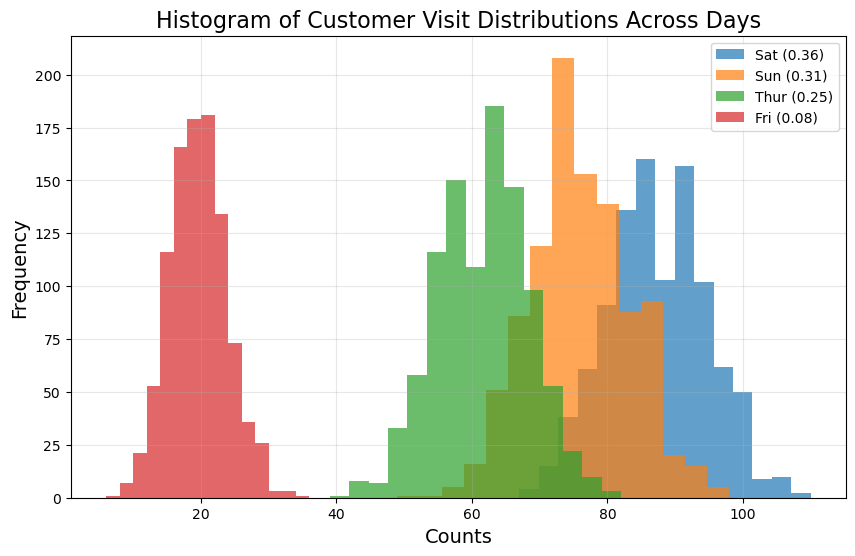

In [8]:
samples = multinomial.rvs(total_customers, pvals, size=1000)  # Simulate data
counts_array = np.array(samples)

plt.figure(figsize=(10, 6))
for i, day in enumerate(day_counts.index):
    plt.hist(counts_array[:, i], bins=15, alpha=0.7, label=f'{day} ({pvals[day]:.2f})')

plt.title("Histogram of Customer Visit Distributions Across Days", fontsize=16)
plt.xlabel("Counts", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

4. **Visualization:**
   - Simulates 1000 random samples from the multinomial distribution using `multinomial.rvs()` and plots histograms for customer counts on each day.

- **Visualization Insight:**
  - Histograms of simulated data demonstrate how customer counts are distributed across days, reflecting observed probabilities.